# Homework 4 writeup solutions

## Name: Zach Gendreau

## Problem 1

### Part a

Text(0.5, 0.92, "Himmelblau's function")

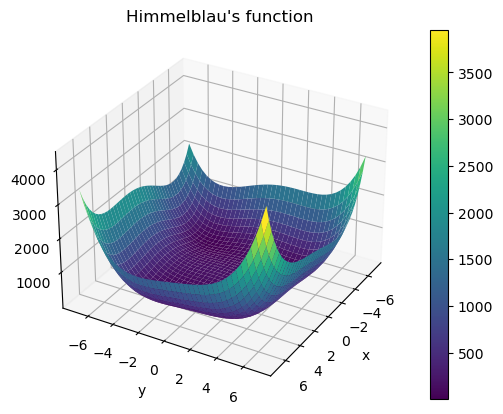

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# First create x
x = np.linspace(-7, 7, 40)
# Now you create y
y = np.linspace(-7, 7, 40)

f = lambda x, y:(x**2+y-11)**2 + (x+y**2-7)**2

# Once you have created them, you can uncomment and run the 
# following line of code.
X, Y = np.meshgrid(x, y)

# Setup the figure
fig = plt.figure() # Create a figure
ax = plt.axes(projection='3d')  # Make it a "3D" figure
# Then you do the rest.
surface = ax.plot_surface(X, Y, f(X,Y), cmap = 'viridis')
fig.colorbar(surface)
ax.view_init(30,30)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Himmelblau's function")

### Part b

Text(0.5, 1.0, "Local minima of Himmelblau's function")

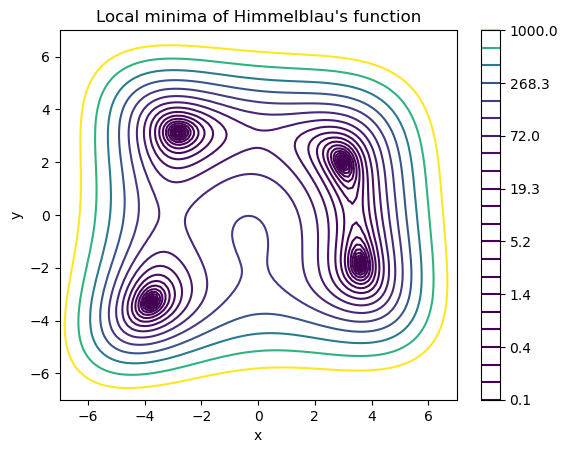

In [109]:
# Setup a new figure
fig2,ax2 = plt.subplots() # Create a new figure and axes

# Define the new x, y, and X, and Y from the meshgrid.
x = np.linspace(-7,7,100)
y = np.linspace(-7,7,100)

f = lambda x, y:(x**2+y-11)**2 + (x+y**2-7)**2

X, Y = np.meshgrid(x, y)

# Once you have defined those then you can create the contour plot with...
# ax2.contour(...) # Fill that in and remove the comment.
cp = ax2.contour(X,Y,f(X,Y),np.logspace(-1,3,22),cmap = 'viridis')
fig2.colorbar(cp)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Local minima of Himmelblau's function")


### Part c

Based on the plot again, we can see 4 approximate locations of minima.

In [51]:
# Define the 4 initial guesses. Uncomment and add to the code here. 
import scipy.optimize
fp = lambda p: f(p[0], p[1]) 
min_1 = scipy.optimize.fmin(fp, (-4,-4))
min_2 = scipy.optimize.fmin(fp, (4,-2))
min_3 = scipy.optimize.fmin(fp, (3,2))
min_4 = scipy.optimize.fmin(fp, (-3,3))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 34
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 33
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 30
         Function evaluations: 59


Once we have found the minima, we can plot them.

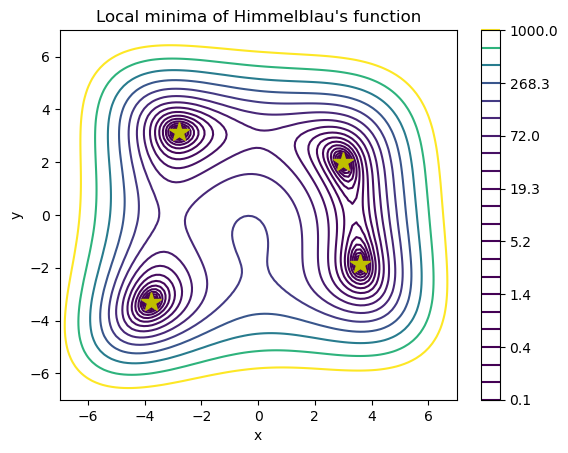

In [111]:
ax2.plot(min_1[0], min_1[1], 'y*', markersize = 15)
ax2.plot(min_2[0], min_2[1], 'y*', markersize = 15)
ax2.plot(min_3[0], min_3[1], 'y*', markersize = 15)
ax2.plot(min_4[0], min_4[1], 'y*', markersize = 15)
fig2

#Not sure why there is a line connecting two stars on the bottom lol

### Part d

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 34
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 33
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 30
         Function evaluations: 59


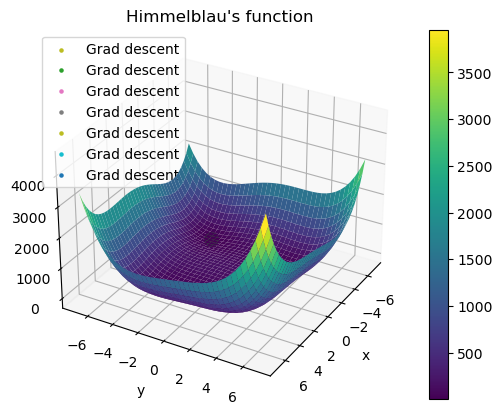

In [110]:
min_1 = scipy.optimize.fmin(fp, (-4,-4))
min_2 = scipy.optimize.fmin(fp, (4,-2))
min_3 = scipy.optimize.fmin(fp, (3,2))
min_4 = scipy.optimize.fmin(fp, (-3,3))
ax.scatter(min_1[0], min_1[1], fp(min_1), 'gs', s = 5, label = "Grad descent")
ax.scatter(min_2[0], min_2[1], fp(min_2), 'gs', s = 5)
ax.scatter(min_3[0], min_3[1], fp(min_3), 'gs', s = 5)
ax.scatter(min_4[0], min_4[1], fp(min_4), 'gs', s = 5)
fig

Code seems to make sense, but plot is not accurate representation

## Problem 2

### Part a

In [121]:
import time # Import the timing algorithm, 
            # we'll see how this works in Week 5.
start = time.time()
tol = 1e-9 # Set the tolerance - note that it changes
# Now run gradient descent!
fxy = lambda x, y:(x**2+y-11)**2 + (x+y**2-7)**2
f = lambda p: fxy(p[0], p[1])
gradf_xy = lambda x,y: np.array([4*x**3 - 42*x + 4*x*y + 2*y**2 - 14,
                                 4*y**3 - 26*y + 4*x*y + 2*x**2 - 22])
gradf = lambda p: gradf_xy(p[0], p[1])
count = 0
p = [2, 3] 
tstep = .025
for k in range(8000): # perform 2000 iterations
    # Check if the gradient is small
    count += 1
    grad = gradf(p)
    if np.linalg.norm(grad)<tol:
        break

    phi = lambda t:p - t*grad
    f_of_phi = lambda t: f(phi(t))
    tmin = scipy.optimize.fminbound(f_of_phi,0,1) # Find time it takes
                                                        # to reach min height
    p = phi(tmin); # Find the point on the path and update your guess

end = time.time()
print(end-start)
## Part e
print(count - 1)

0.007550954818725586
16


### Part b-d

### Part e - the results

 |             | Number Iterations | Time(Seconds) | Converged (Yes/No) |
 |---          | ---               | ---  |   ---              |
 |tstep = 0.01 | 81      | 0.00221 |  Yes     |
 |tstep = 0.02 | 55                  | 0.00189     |   Yes                 |
 |tstep = 0.025|  7999                 |   0.09798   |        No            |
 |`fminbound`  |     16              |    0.00632  |          Yes          |

### Part f - discussion

- I found that the Gradient descent algorithm did not *always* converge. We see that with a tstep size of 0.025, all 8000 itertions are used to find the gradient. In this case, the step size is too big to find the minimum of the function from the starting point that we gave it. If the step size is too big, the minimum will continue to be "missed" by the guesses. 

- I found that Gradient Descent converged fastest with a fixed time step and a step size of 0.02

- I found that Gradient Descent converged with the fewest iterations using fminbound

- The answers are not the same. While using a fixed time step often requires more iterations, the calculations in each iteration are much faster than if we were to use fminbound. In our example, a tstep of 0.02 took 55 iterations, however, the total time was the quickest of all methods. The fminbound method is more *accurate* in each step of the iteration but takes more time to calculate the next guess. Both have their advantages, but we see that with the correct tstep, using a fixed time step is more efficient. 
